In [3]:
import pandas as pd
df = pd.read_csv('Acadamic_performance.csv')

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

math score               3
reading score            2
writing score            1
placement score          2
club join year           1
placement offer count    1
gender                   0
region                   3
dtype: int64


In [7]:
numeric_cols = ['math score', 'reading score', 'writing score', 'placement score', 'club join year', 'placement offer count']

In [9]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [13]:
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [15]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [17]:
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

math score               1
reading score            0
writing score            1
placement score          1
club join year           0
placement offer count    0
dtype: int64


In [21]:
for col in numeric_cols:
    df[col] = df[col].clip(lower=(Q1[col] - 1.5 * IQR[col]), upper=(Q3[col] + 1.5 * IQR[col]))

In [23]:
print(outliers.sum())

math score               1
reading score            0
writing score            1
placement score          1
club join year           0
placement offer count    0
dtype: int64


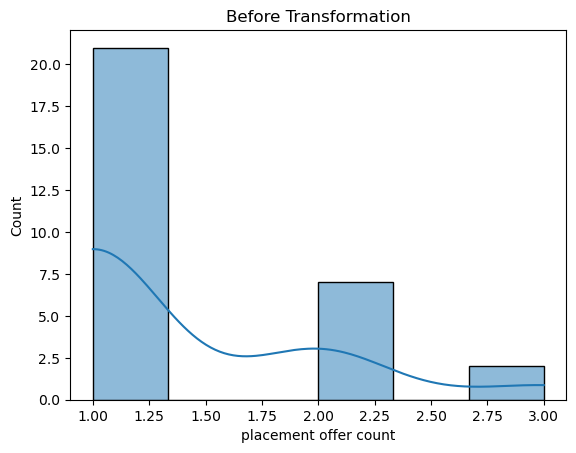

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Before transformation
sns.histplot(df['placement offer count'], kde=True)
plt.title('Before Transformation')
plt.show()

In [29]:
df['placement offer count log'] = np.log1p(df['placement offer count'])

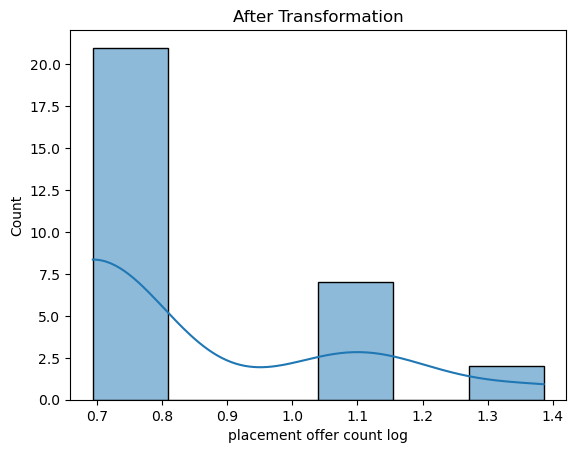

In [31]:
sns.histplot(df['placement offer count log'], kde=True)
plt.title('After Transformation')
plt.show()